### Rejection Sampler

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def sampler_function(n_samples, sample_distribution='gaussian', a=0, b=1):
    if sample_distribution == 'uniform':
        samples = np.random.uniform(a,b, n_samples)
        probability = 1 / (b - a) * np.ones(n_samples)
        
    elif sample_distribution == 'gaussian':
        samples = np.random.normal(a,b,n_samples)
        probability = (1 / (np.sqrt(2 * np.pi * b * b))) * np.exp(-1 * (((samples - a)**2) / (2 * b * b)))
        
    else:
        raise NotImplementedError
    return samples, probability

In [7]:
def target_density(samples):
    return np.sin(samples)**2

In [8]:
def rejection_sampler(n_samples, sampler, target):
    samples, sample_prob = sampler(n_samples)
    
    targ_prob = target(samples)
    
    k = (targ_prob / sample_prob).max()
    
    accepted = targ_prob / (sample_prob * k) > np.random.rand(n_samples)
    
    rej = 1 - len(samples[accepted]) / n_samples
    
    return samples[accepted], rej

In [13]:
# partial functions aka wrapper function
def my_sampler(n_samples):
    return sampler_function(n_samples, sample_distribution='uniform', a=0, b=10)

In [14]:
accepted, rej = rejection_sampler(10000, my_sampler, target_density)

In [15]:
rej

0.5213

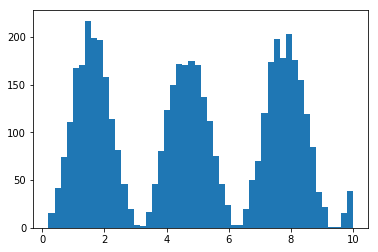

In [16]:
plt.hist(accepted, 50);